In [7]:
#upload libraries 
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
import requests
from bs4 import BeautifulSoup
#Beautiful Soup is a Python package for parsing HTML and XML documents.#


What is a metatag?

Meta tags are snippets of text that describe a page's content; the meta tags don't appear on the page itself, but only in the page's source code

In [15]:
#First Website 

#scrape first website
r = requests.get('http://www.foxnews.com/')
soup = BeautifulSoup(r.content, features="lxml")

#search for all meta strings
meta = soup.find_all('meta')

metatags = []

#grab all metatags
for tag in meta:
    if 'name' in tag.attrs.keys() and tag.attrs['name'].strip().lower() in ['keywords']:
        print ('CONTENT :',tag.attrs['content'])
        metatags.append(tag.attrs['content'])
        
#split by comma 
metatags = [item for items in metatags for item in items.split(",")]

#store as set
metatags = set(metatags)

CONTENT : news, breaking news, latest news, current news, world news, national news


In [16]:
#2nd Website
r1 = requests.get('http://www.cnn.com/')
soup1 = BeautifulSoup(r1.content, features="lxml")

meta1 = soup1.find_all('meta')

metatags1 = []

for tag in meta1:
    if 'name' in tag.attrs.keys() and tag.attrs['name'].strip().lower() in ['keywords']:
        print ('CONTENT :',tag.attrs['content'])
        metatags1.append(tag.attrs['content'])
metatags1 = [item for items in metatags1 for item in items.split(",")]
metatags1 = set(metatags1)


CONTENT : cnn news, daily news, breaking news, news today, current events


In [17]:
#3rd Website 
r2 = requests.get('http://www.abcnews.com/')
soup2 = BeautifulSoup(r2.content, features="lxml")

meta2 = soup2.find_all('meta')

metatags2 = []

for tag in meta2:
    if 'name' in tag.attrs.keys() and tag.attrs['name'].strip().lower() in ['keywords']:
        print ('CONTENT :',tag.attrs['content'])
        metatags2.append(tag.attrs['content'])
metatags2 = [item for items in metatags2 for item in items.split(",")]
metatags2 = set(metatags2)

CONTENT : ABC News, breaking news, headline news, latest news, top news, online news, video news, world news, national news, abc news, abcnews, abc news online,breaking news, latest news, top news, news video, abc news


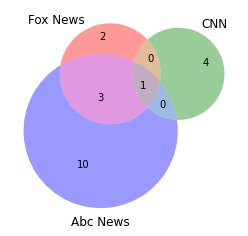

In [20]:
#create a diagram 
venn3([metatags, metatags1, metatags2], ('Fox News', 'CNN', 'Abc News'))
plt.show()

In [32]:
print("The most common metatag is" + " " + str(metatags.intersection(metatags1, metatags2) ))

The most common metatag is {' breaking news'}
